<center><font size = 5><b><i>Assignment4</i></b></font></center>
<div style="text-align: right"><i>By Yi Zhou</i></div>

### Problem 1: Decision Trees for Spam Classification

#### 1.1

In [1]:
import math
def binary_entropy(p):
    if p == 0.0 or p == 1.0:
        return 0
    
    return (-p) * math.log(p,2.0) - (1.0 - p) * math.log(1.0 - p, 2.0)
hy = binary_entropy(0.6)
print "Entropy H(y) of this binary class variable y: " + str(hy) 

Entropy H(y) of this binary class variable y: 0.970950594455


#### 1.2

In [2]:
def binary_information_gain(hy,x_true,x_true_y_true,x_false_y_true):
    return hy - x_true * binary_entropy(x_true_y_true) - (1 - x_true) * binary_entropy(x_false_y_true)
print "Information gain for feature x1 is: " + str(binary_information_gain(hy,0.6,0.5,0.25))
print "Information gain for feature x2 is: " + str(binary_information_gain(hy,0.5,0.0,0.8))
print "Information gain for feature x3 is: " + str(binary_information_gain(hy,0.7,3.0 / 7.0,1.0 / 3.0))
print "Information gain for feature x4 is: " + str(binary_information_gain(hy,0.7,2.0 / 7.0,2.0 / 3.0))
print "Information gain for feature x5 is: " + str(binary_information_gain(hy,0.3,1.0 / 3.0,3.0 / 7.0))
print "We should choose feature 2 as root"

binary_information_gain(1,)

Information gain for feature x1 is: 0.046439344671
Information gain for feature x2 is: 0.609986547011
Information gain for feature x3 is: 0.00580214901435
Information gain for feature x4 is: 0.0912774462417
Information gain for feature x5 is: 0.00580214901435
We should choose feature 2 as root


#### 1.3

In [44]:
def decision_tree(x1,x2,x3,x4,x5):
    y = None
    if x2 == 1:
        y = -1
    else:
        if x4 == 0:
            y = 1
        else:
            if x1 == 1:
                y = 1
            else:
                if x3 == 1:
                    y = -1
                else:
                    y = 1
    return y
print(decision_tree(0,0,1,1,0))
print(decision_tree(1,1,0,1,0))
print(decision_tree(0,1,1,1,1))
print(decision_tree(1,1,1,1,0))
print(decision_tree(0,1,0,0,0))
print(decision_tree(1,0,1,1,1))
print(decision_tree(0,0,1,0,0))
print(decision_tree(1,0,0,0,0))
print(decision_tree(1,0,1,1,0))
print(decision_tree(1,1,1,1,1))
print "As we can see my decision tree splits all data perfectly"

-1
-1
-1
-1
-1
1
1
1
1
-1
As we can see my decision tree split all data perfectly


### Problem 2: Decision Trees in Python 

In [2]:
import numpy as np
import mltools as ml
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None) 
X,Y = ml.shuffleData(X,Y)
# and simlarly for test data features and target values

#### 2.1 

In [86]:
for i in range(1,15):
    print "Feature " + str(i) + " Max: " + str(max(X[:,i - 1])) + " Min: " + str(min(X[:,i-1])) + \
    " Mean: " + str(np.mean(X[:,i-1])) + " var: " + str(np.var(X[:,i - 1]))

Feature 1 Max: 253.0 Min: 197.0 Mean: 241.8989735 var: 81.1988159813
Feature 2 Max: 248.0 Min: 190.0 Mean: 228.381307 var: 89.1502653418
Feature 3 Max: 252.02 Min: 214.97 Mean: 241.9059345 var: 34.5577443467
Feature 4 Max: 252.02 Min: 205.42 Mean: 233.8253765 var: 94.5072114082
Feature 5 Max: 17130.0 Min: 10.0 Mean: 2849.0465 var: 10505588.3006
Feature 6 Max: 12338.0 Min: 0.0 Mean: 862.8611 var: 3090415.20751
Feature 7 Max: 9238.0 Min: 0.0 Mean: 163.65265 var: 698073.355698
Feature 8 Max: 27.419 Min: 0.0 Mean: 3.0557549345 var: 7.27689094671
Feature 9 Max: 18.107 Min: 1.2189 Mean: 6.311441945 var: 6.18300320297
Feature 10 Max: 11.368 Min: 0.0 Mean: 1.89391480435 var: 4.15093181021
Feature 11 Max: 18.771 Min: 0.0 Mean: 4.289551351 var: 3.94461529254
Feature 12 Max: 14.745 Min: 0.0 Mean: 2.7977508345 var: 1.93234397277
Feature 13 Max: 278.71 Min: 1.0271 Mean: 10.452536635 var: 170.00184292
Feature 14 Max: 769.2 Min: -999.9 Mean: 7.65813 var: 1528.9473589


#### 2.2

In [21]:
print Y.shape
Xtr = X[:10000,:]
Ytr = Y[:10000]
Xva = X[10000:,:]
Yva = Y[10000:]
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)

(20000,)


In [22]:
print "Training err: " + str(learner.err(Xtr,Ytr))
print "Validation err: " + str(learner.err(Xva,Yva))

Training err: 0.0119
Validation err: 0.3744


#### 2.3

In [34]:
maxDepth = range(0,16)
train_err = []
validation_err = []
for depth in maxDepth:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=depth)
    train_err.append(learner.err(Xtr,Ytr))
    validation_err.append(learner.err(Xva,Yva))

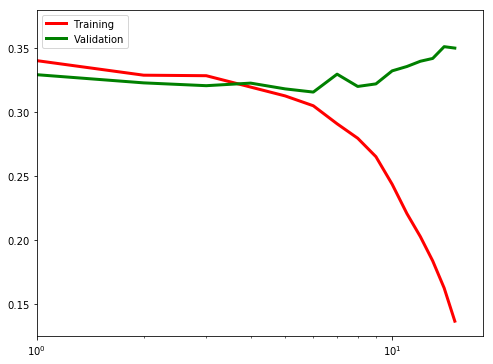

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# I added lw (line width) and the label. 
ax.semilogx(maxDepth, train_err, 'r-', lw=3, label='Training')
ax.semilogx(maxDepth, validation_err, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
ax.legend()

# Controlling the axis.
ax.set_xlim(0, 18)

# And still doing this to clean the canvas.
plt.show()

According to the plot above, we can conlude that model with higher maxdepth has higher complexity. MaxDepth = 6 can provide best model

#### 2.4

In [50]:
minParent = [2**x for x in range(2,13)]
train_err = []
validation_err = []
for parent in minParent:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50,minParent=parent)
    train_err.append(learner.err(Xtr,Ytr))
    validation_err.append(learner.err(Xva,Yva))

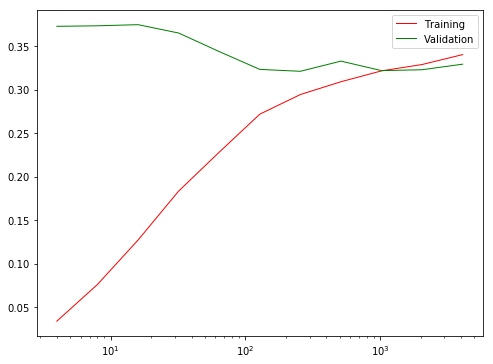

256

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# I added lw (line width) and the label. 
ax.semilogx(minParent, train_err, 'r-', lw=1, label='Training')
ax.semilogx(minParent, validation_err, 'g-', lw=1, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
ax.legend()

# And still doing this to clean the canvas.
plt.show()
minParent[np.argmin(validation_err)]

According to the plot, we can conlude that higher minParent model has lower complexity, The best choice of minParent is 256

### 2.5

In [59]:
minLeaves = [2**x for x in range(2,13)]
train_err = []
validation_err = []
for leaf in minLeaves:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50,minLeaf = leaf)
    train_err.append(learner.err(Xtr,Ytr))
    validation_err.append(learner.err(Xva,Yva))

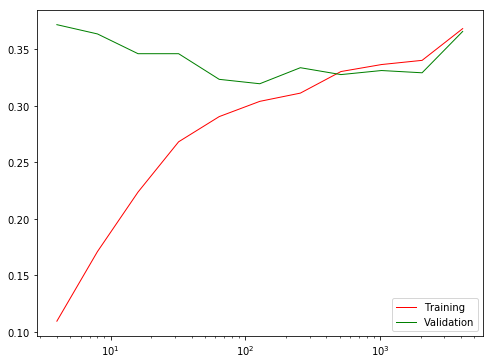

128

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# I added lw (line width) and the label. 
ax.semilogx(minLeaves, train_err, 'r-', lw=1, label='Training')
ax.semilogx(minLeaves, validation_err, 'g-', lw=1, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
ax.legend()

# And still doing this to clean the canvas.
plt.show()

Controling minLeaf and controling minParent might have the same effect.

### 2.6

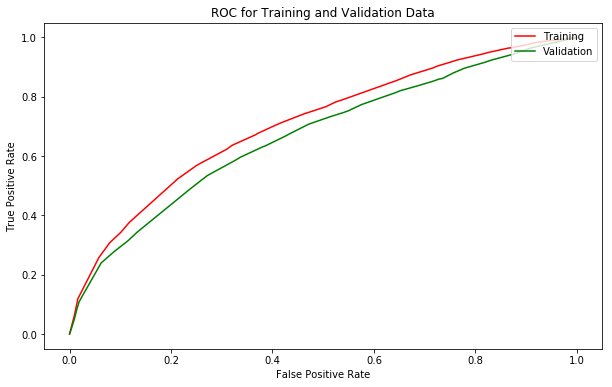

The AUC score of training data is: 0.71260139096
The AUC score of validation data is: 0.672140967409


In [80]:
best_model = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=7,minParent=256)
fprTrain, tprTrain, tnrTrain = best_model.roc(Xtr, Ytr)
fprValidation, tprValidation, tnrValidation = best_model.roc(Xva, Yva)

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
plt.plot(fprTrain, tprTrain, 'r', label='Training')
plt.plot(fprValidation, tprValidation, 'g', label='Validation')
plt.title('ROC for Training and Validation Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper right')
plt.show()

print "The AUC score of training data is: " + str(best_model.auc(Xtr,Ytr))
print "The AUC score of validation data is: " + str(best_model.auc(Xva,Yva))

### 2.7

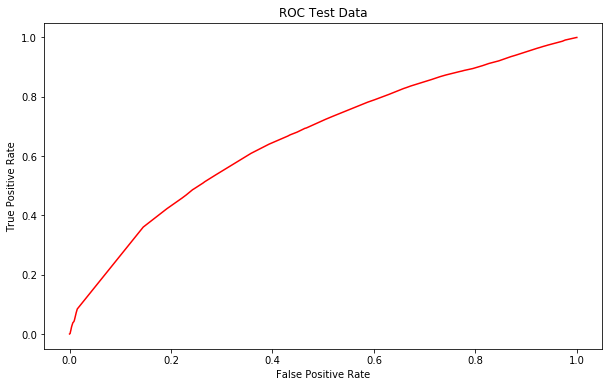

The error of my model on test data is: 0.32135
The AUC score of my model on test data is: 0.667994512393


In [84]:
X_test = np.genfromtxt('data/X_test.txt', delimiter=None)
Y_test = np.genfromtxt('data/Y_test.txt', delimiter=None)
my_model = ml.dtree.treeClassify(X,Y,maxDepth=7,minParent=256)
fprTest, tprTest, tnrTest = my_model.roc(X_test, Y_test)

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
plt.plot(fprTest, tprTest, 'r')
plt.title('ROC Test Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper right')
plt.show()

print "The error of my model on test data is: " + str(my_model.err(X_test,Y_test))
print "The AUC score of my model on test data is: " + str(my_model.auc(X_test,Y_test))

## Problem 3  Ensemble Methods (Option 1)

1
5
10
25
45


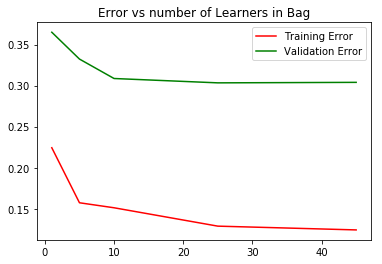

Minimum Error on an Ensemble of Learners =  0.3034
Number of Learners in Ensemble =  25


In [97]:
bags = [1,5,10,25,45]
bagTrainError = []
bagValidationError = []
ensembles = []

def random_forest_predict(ensemble, X,Y):
    Yhat = np.zeros((X.shape[0],len(ensemble)))
    for i in range(len(ensemble)):
        Yhat[:,i] = ensemble[i].predict(X)
    Yhat = np.mean(Yhat,axis=1)
    Yhat[Yhat > 0.5] = 1
    Yhat[Yhat <= 0.5] = 0
    return Yhat
    
for bag in bags:
    print bag
    decisionTrees = bag * [None]
    for i in range(bag):
        Xi, Yi = ml.bootstrapData(X=Xtr,Y=Ytr,n_boot=10000)
        decisionTree = ml.dtree.treeClassify(X=Xi,Y=Yi,maxDepth=16,minLeaf=4)
        decisionTrees[i] = decisionTree
    YHatTrain = random_forest_predict(decisionTrees,Xtr,Ytr)
    YHatVal = random_forest_predict(decisionTrees,Xva,Yva)
    bagTrainError.append(np.mean(YHatTrain != Ytr))
    bagValidationError.append(np.mean(YHatVal != Yva))
    ensembles.append(decisionTrees)
        
plt.plot(bags, bagTrainError, 'r', label='Training Error')
plt.plot(bags, bagValidationError, 'g', label='Validation Error')
plt.legend(loc='upper right')
plt.title('Error vs number of Learners in Bag')
plt.show()

index = np.argmin(bagValidationError)
print "Minimum Error on an Ensemble of Learners = ", bagValidationError[index]
print "Number of Learners in Ensemble = ", bags[index]

### 3.2

In [98]:
ensemble = []
for i in range(25):
    Xi, Yi = ml.bootstrapData(X=X,Y=Y,n_boot=10000)
    decisionTree = ml.dtree.treeClassify(X=Xi,Y=Yi,maxDepth=16,minLeaf=4)
    ensemble.append(decisionTree)

In [100]:
test_predict = random_forest_predict(ensemble,X_test,Y_test)
print "error_rate: " + str(np.mean(test_predict != Y_test))

error_rate: 0.29925


I choose the ensemble size = 25, and get an error rate of 0.29925 on test data set, which is an obvious improvement to my best single decision tree model

<font size=5><b><i>Statement of Collaboration</b></i></font>

I obeyed the UCI Academic Honesty Policy. During my work on this assignment, I didn't discuss anything with anybody about the homework that's to say I finished all things above on my own.